<center><h2>DS102 Problem Set - Week 3</h2></center>
**Hackwagon Academy**

`HWA-DS102-PS3-201810`
<hr>

If you have any questions to the Problem Set, feel free to send a message to your TAs or Instructors in the Telegram chat. You are encouraged to also discuss the problem sets within your own groups.

<div class="alert alert-success">Before you start, fill in your details for this notebook and rename the notebook to `<First_Name>_<Last_Name>-problem-set-week-3`, for example `jane-doe-problem-set-week-3`.</div>

In [25]:
# Rename the notebook. Then, fill in your details here.
# Name  : Victor Wong
# Class : Thurs 7pm

#### Datasets Required:

- `sgp-literacy-rate.csv`

- `insurance-claims.csv`

- `ks-projects-15k.csv`

- `wines-200.csv`

- `loans-by-grade.csv`

In [26]:
# import the relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set matplotlib inline
%matplotlib inline

### Part 1 (5 Marks)
Mark breakdowns are stated in the question e.g. **`[1]`**. For questions wtih short answers, <span style="color:darkblue">**both the <u>code</u> and <u>typed answers</u> must be provided to receive full credit.**</span> <span style="color:darkblue">**For plotting, <u>all features</u> must be present to receive full credit.**</span>

**1A**. 

**i)** What are the key features of a plot that needs to be explicitly stated? **`[0.5]`**

In [27]:
# What are the key features of a plot that needs to be explicitly stated?
# Code is not required.
# (Type your answer here)
# Figure Dimensions, Fig and axis, titles (plot and axis), legend, reasonable tick values

**ii)**  You are given the following data in `sgp-literacy-rate.csv`, taken from [World Bank Open Data](https://data.worldbank.org/indicator/SE.ADT.LITR.ZS?view=chart). The definition of each column is as follows:

`sgp-literacy-rate.csv`

| col name | definition | datatype | example |
| -------- | ---------- | -------- | ------- |
| literacy_rate | The percentage of people aged 15 and above who can both read and write | float | 96.716660 |
| year | The year in which the literacy rate was obtained | int | 2010 |

** Read from CSV to `df`**

Read the data from the `sgp-literacy-rate.csv` CSV file into a `DataFrame` called `sgp_lr_df`.

In [38]:
# Read from CSV to sgp_lr_df. Write your code here.
sgp_lr_df = pd.read_csv('sgp-literacy-rate.csv', sep = '|')
sgp_lr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
literacy_rate    7 non-null float64
year             7 non-null int64
dtypes: float64(1), int64(1)
memory usage: 192.0 bytes


The following code to plot the line graph is given to you. It plots the literacy rate of Singapore (% of people ages 15 and above) from 2010 to 2016. Perform the following steps:

1. Run the code to plot the line graph. 
2. Using your answer from **1A** or otherwise, modify the code to add the missing features of the plot. **`[1]`**

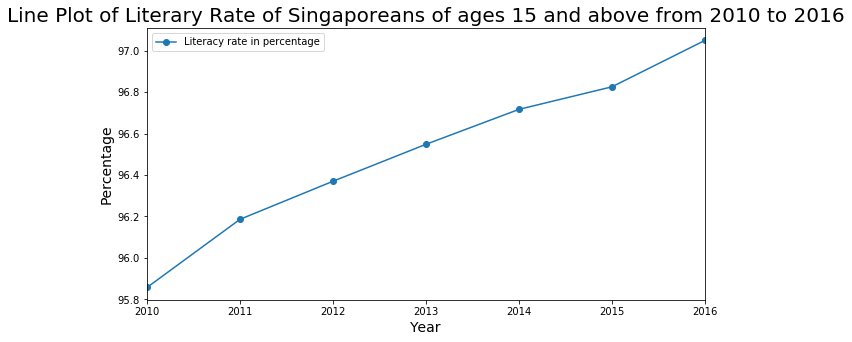

In [57]:
# Instructions: modify the code to add the missing features of the plot

fig, ax1 = plt.subplots()
sgp_lr_df.plot(kind='line', x='year', y='literacy_rate', ax=ax1, figsize=(10,5), marker='o')
ax1.set_title('Line Plot of Literary Rate of Singaporeans of ages 15 and above from 2010 to 2016', fontsize= 20)
ax1.set_xlabel('Year', fontsize = 14)
ax1.set_ylabel('Percentage', fontsize = 14)
ax1.legend(['Literacy rate in percentage'])

# Display the line graph
plt.show()

**1B.** You are given a baggage loss dataset from the [TSA Claims Database](https://www.kaggle.com/terminal-security-agency/tsa-claims-database). In this dataset, the `case_number` represents the unique ID associated with the case from the insurer and `claim_amount` is the amount of claim filed by the passenger, or the loss due to travelling borne by the passenger.

#### Read from CSV to `df`
Read the dataset from `insurance-claims.csv` to a `DataFrame` called `ins_df`.

In [65]:
# Read from CSV to ins_df. Write your code here.
ins_df = pd.read_csv('insurance-claims.csv')
ins_df.describe()
ins_df.head()

,case_number,claim_amount
0,2004103065920,50.00
1,0226059M,312.50
2,2006012099982,90.00
3,2005010372123,216.00
4,2004092263584,178.74


**i)** Plot a histogram for `claim_amount` using $8$ bins. Use the `bins` parameter to specify this. Also, as we do not need the KDE component, set the parameter `kde=False`. Ensure that **all features of the plot have to be shown** for full credit. Clue: Use `sns.distplot()`. **`[1]`**

**Note**: If you see this error:

```
Warning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
```

You can ignore it. The plot will not be affected.

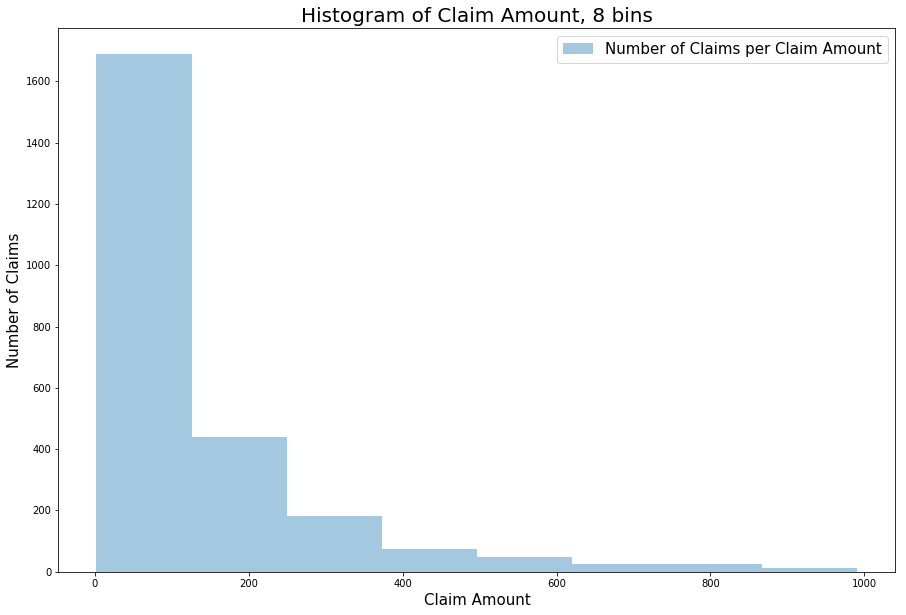

In [86]:
# Plot a histogram for claim_amount using 8 bins.
fig = plt.figure(figsize= (15,10))
ax1 = fig.add_subplot(111)

# Write your code here.
sns.distplot(ins_df['claim_amount'], kde=False, ax=ax1, bins=8)
ax1.set_title('Histogram of Claim Amount, 8 bins', fontsize=20)
ax1.legend(['Number of Claims per Claim Amount'], fontsize= 15)
ax1.set_xlabel('Claim Amount', fontsize= 15)
ax1.set_ylabel('Number of Claims', fontsize=15)

plt.show()

**ii)** The following `DataFrame` called `ins_df_agg_c` is given to you. Run the code. What is the interpretation of `count` in `ins_df_agg_c` with respect to the plotted histogram in **i)** ?  **`[0.5]`**

In [90]:
# No additional code is required.
ins_df_agg = pd.cut(ins_df['claim_amount'], 8).reset_index(name='bin_range')
ins_df_agg_c = ins_df_agg.groupby('bin_range').size().reset_index(name='count')
ins_df_agg_c

# What is the interpretation of count in ins_df_agg_c with respect to the plotted histogram?
# (Type your answer here)
# Number of claims per bin (8) in the plotted histogram

,bin_range,count
0,"(1.011, 125.625]",1689
1,"(125.625, 249.25]",440
2,"(249.25, 372.875]",181
3,"(372.875, 496.5]",76
4,"(496.5, 620.125]",48
5,"(620.125, 743.75]",26
6,"(743.75, 867.375]",27
7,"(867.375, 991.0]",13


**1C.** You are given the details of some projects taken from the [KickStarter Projects](https://www.kaggle.com/kemical/kickstarter-projects) dataset. The definition of each column is as follows:

`ks-projects-15k.csv`

| col name | definition | datatype | example |
| -------- | ---------- | -------- | ------- |
| ID | internal kickstart ID | int | 59178964 |
| name | name of a kickstarter project | str | I Believe in King The Kid |
| main_category | category of a campaign | str | Music |
| backers | the number of backers a project has | int | 444 |
| usd_pledged_real | the amount that was pledged for the project, in USD | float | 27591.46 |
| usd_goal_real | the fundraising goal of the project, in USD | float | 55000 | 

#### Read from CSV to `df`
Read the dataset from `ks-projects-15k.csv` to a `DataFrame` called `kst_df`.

In [98]:
# Read from CSV to kst_df. Write your code here.
kst_df = pd.read_csv('ks-projects-15k.csv')
display(kst_df.describe(include = 'all'))
kst_df.head()

,ID,name,main_category,backers,usd_pledged_real,usd_goal_real
count,2.087000e+03,2087,2087,2087.000000,2.087000e+03,2.087000e+03
unique,NaN,2086,15,NaN,NaN,NaN
top,NaN,Homesick,Film & Video,NaN,NaN,NaN
freq,NaN,2,386,NaN,NaN,NaN
mean,1.051196e+09,NaN,NaN,630.418304,6.008224e+04,3.493625e+04
std,6.055055e+08,NaN,NaN,2559.927336,2.616634e+05,9.121092e+04
min,1.877302e+06,NaN,NaN,3.000000,1.000013e+04,1.000000e+00
25%,5.384344e+08,NaN,NaN,119.000000,1.304023e+04,1.000000e+04
50%,1.064306e+09,NaN,NaN,218.000000,2.044900e+04,1.500000e+04
75%,1.556136e+09,NaN,NaN,464.000000,3.789844e+04,3.000000e+04


,ID,name,main_category,backers,usd_pledged_real,usd_goal_real
0,200590717,Brian's Songs: Love. Friendship. Dreams... and...,Film & Video,444,65050.50,55000.0
1,59178964,PUPPYCIDE: The Documentary,Film & Video,958,60397.50,100000.0
2,1696773081,I Believe In King The Kid,Music,676,27591.46,20000.0
3,1072617654,Lullabies from the Heart with Robert Robinson,Music,146,22259.32,22000.0
4,1003478705,The Wheelhouse: A Farm to Table Restaurant in ...,Food,43,10205.00,10000.0


**i)** Filter for all Kickstarter Projects where the total amount pledged in USD, or `usd_pledged_real` is greater than $\$10000$.  Store this in a new `DataFrame` called `kst_df_10k`. **`[0.5]`**

In [102]:
# Filter for all Kickstarter Projects where the usd_pledged_real is greater than 10000.
# (Write your code here)
kst_df_10k = kst_df.copy()
kst_df_10k = kst_df_10k[kst_df_10k['usd_pledged_real'] > 10000]
kst_df_10k.head()
# kst_df_10k.describe()

,ID,name,main_category,backers,usd_pledged_real,usd_goal_real
0,200590717,Brian's Songs: Love. Friendship. Dreams... and...,Film & Video,444,65050.50,55000.0
1,59178964,PUPPYCIDE: The Documentary,Film & Video,958,60397.50,100000.0
2,1696773081,I Believe In King The Kid,Music,676,27591.46,20000.0
3,1072617654,Lullabies from the Heart with Robert Robinson,Music,146,22259.32,22000.0
4,1003478705,The Wheelhouse: A Farm to Table Restaurant in ...,Food,43,10205.00,10000.0


**ii)** Create a new `DataFrame`, `kst_df_agg` where the first column is the `main_category` and the second column is called `n`. In `kst_df_agg`, `main_category` is the main category of `kst_df_10k` and `n` is the number of projects belonging to that `main_category`. Hint: use `df.groupby().size()`.  **`[0.5]`**

In [110]:
# Create an aggregated df with 1 column being the main_category and the other column
# being the no. of projects in that category.
# (Write your code here)
kst_df_agg = kst_df_10k.groupby(['main_category']).size().reset_index(name = 'n')
kst_df_agg

,main_category,n
0,Art,77
1,Comics,70
2,Crafts,13
3,Dance,11
4,Design,289
5,Fashion,94
6,Film & Video,386
7,Food,155
8,Games,280
9,Journalism,12


**iii)** Using your answers to **(i)** and **(ii)** or otherwise, plot a bar graph where the $x$-axis is the `main_category` and the $y$-axis is the number of projects belonging to that `main_category`. **`[1]`**

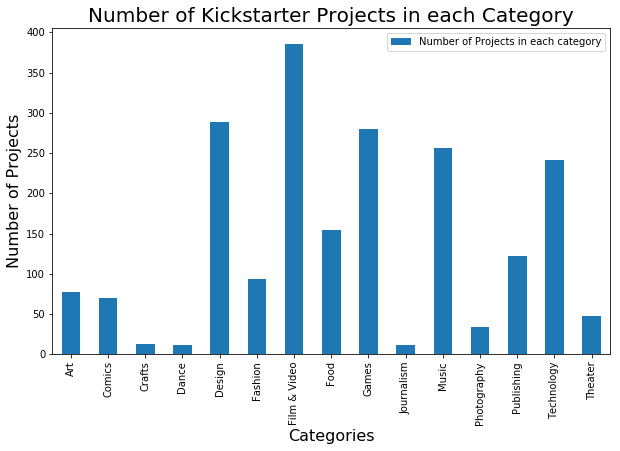

In [137]:
# Plot the bar graph where the x-axis is the main_category and 
# the y-axis is the number of projects belonging to that main_category
# (Write your code here)
fig, ax = plt.subplots()
kst_df_agg.plot(x = 'main_category', y = 'n', kind = 'bar', ax=ax, figsize= (10,6))
ax.set_title("Number of Kickstarter Projects in each Category", fontsize = 20)
ax.set_xlabel('Categories', fontsize = 16)
ax.set_ylabel('Number of Projects', fontsize = 16)
ax.legend(['Number of Projects in each category'])

plt.show()

<div class="alert alert-success">
**Checkpoint**: When you have completed Part 1, upload your progress to eLearn. eLearn only accepts the latest notebooks so if you have an existing notebook, your latest upload will **override** it.
</div>

### Part 2 (7 Marks)
For questions wtih short answers, <span style="color:darkblue">**both the <u>code</u> and <u>typed answers</u> must be provided to receive full credit.**</span> <span style="color:darkblue">**For plotting, <u>all features</u> must be present to receive full credit.**</span>


**2A**. You are given the score and price of some bottles of wines taken from the [Wine Reviews](https://www.kaggle.com/zynicide/wine-reviews) dataset. The definition of each column is as follows:

`wines-200.csv`

| col name | definition | datatype | example |
| -------- | ---------- | -------- | ------- |
| country | The country that the wine is from | str | US |
| points | The number of points WineEnthusiast rated the wine on a scale of 1-100 | int | 86 |
| price | The price of the bottle of wine | float | 12.0 |

#### Read from CSV to `df`
Read the dataset from `wines-200.csv` to a `DataFrame` called `wines_df`.

In [200]:
# Read from CSV to wines_df. Write your code here.
wines_df = pd.read_csv('wines-200.csv')

wines_df.head()

,country,points,price
0,US,86,50.0
1,Italy,92,48.0
2,France,89,19.0
3,US,92,34.0
4,US,84,20.0


**i)**. Using `dropna()`, remove all records where the `price` value is not given. What is the `shape` of `wines_df` after removing the values?**`[0.5]`**

In [208]:
# Remove the records where the price is not given
# (Write your code here)
wines_df = wines_df.dropna()


# What is the shape of wines_df after removing the values?
x= wines_df.shape
print(x)
# (185,3)

(185, 3)


**ii)**. Using your answers to **i)** or otherwise, plot a scatterplot where the $x$-axis represents the number of points a wine has received, and the $y$-axis is the price of the wine. Only plot for points where <u>both the point and price value exist</u>. The title, $x$-axis label and $y$-axis label **must be shown** to obtain full credit. **`[1]`**

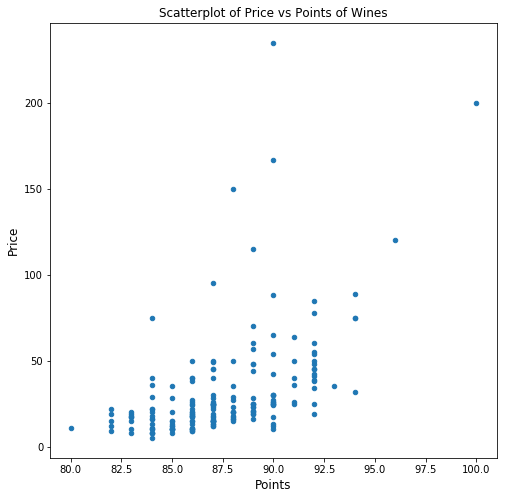

In [220]:
# Plot the scatterplot where the x-axis represents the number of points a wine has received, 
# and the y-axis is the price of the wine.
# Write your code here
wines_df.plot(kind = 'scatter', x = 'points', y = 'price', figsize = (8,8), title = "Scatterplot of Price vs Points of Wines")
plt.xlabel('Points', fontsize = 12)
plt.ylabel('Price', fontsize = 12)

plt.show()

**iii)** Complete the code below to plot a boxplot showing the distribution of the `point`s of the bottles of wines.  **`[0.5]`**

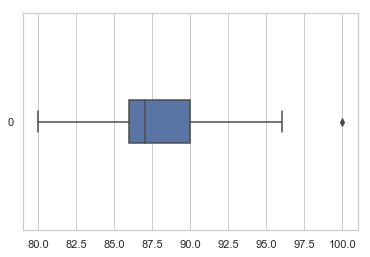

In [227]:
# Complete the code below to plot a boxplot.
sns.set(style="whitegrid")
sns.boxplot(data = wines_df['points'], orient="h", width=0.2)


# Show the boxplot
plt.show()

**iv)** Using the plot of **iii)** to help you or otherwise, find the number of outliers for the `point`s distribtution of the wines dataset. **`[0.5]`**

In [247]:
# Find the number of outliers for the points distribtution of the wines dataset.
# (Write your code here)
# Hint: Use the following code to help you:
p25 = np.percentile(wines_df['points'], 25)
p75 = np.percentile(wines_df['points'], 75)

iqr = p75-p25

upper_range = float(1.5*iqr + p75)
lower_range = float(p25 - 1.5*iqr)

wines_out_df = wines_df.copy()
wines_out_df = wines_out_df[(wines_out_df['points'] > upper_range) |
                           (wines_out_df['points']< lower_range)]

wines_out_df

# How many outliers are there for the points distribtution of the wines dataset?
# (Type your answer here)
# 1

,country,points,price
163,US,100,200.0


<hr>
**2B.** You are given the number of loans per term for each grade taken from a sample from the [Lending Club Dataset](https://www.kaggle.com/wendykan/lending-club-loan-data). The definition of each column is as below.

`loans-by-grade.csv`

| col name | definition | datatype | example |
| -------- | ---------- | -------- | ------- |
| grade | The grade scored | str | A |
| 36 months | The number of loans with a 36 month term (repayment must be complete in 3 years) | int | 18572 |
| 60 months | The number of loans with a 60 month term (repayment must be complete in 5 years) | int | 8013 |

#### Read from CSV to `df`
Read the dataset from `loans-by-grade.csv` to a `DataFrame` called `loans_df`.

In [251]:
# Read from CSV to loans_df. Write your code here.
loans_df = pd.read_csv('loans-by-grade.csv')
loans_df

,grade,36 months,60 months
0,A,18572,670
1,B,27570,5572
2,C,21087,10739
3,D,9973,8013
4,E,2859,6296
5,F,580,2353
6,G,96,620


**i)** Add a column to `loans_df` called `Total Loans`. This represents the total number of 36 & 60 month loans belonging to the grade. **`[0.5]`**.

In [253]:
#Add a column to loans_df called 'Total Loans'
# Write your code here
loans_df['Total Loans'] = loans_df['36 months'] + loans_df['60 months']
loans_df

,grade,36 months,60 months,Total Loans
0,A,18572,670,19242
1,B,27570,5572,33142
2,C,21087,10739,31826
3,D,9973,8013,17986
4,E,2859,6296,9155
5,F,580,2353,2933
6,G,96,620,716


**ii)** 
- What proportion of the loans in Grade **A** are 36 month loans?
- What proportion of the loans in Grade **A** are 60 month loans? 

**`[0.5]`**

In [258]:
# What proportion of the loans in Grade A are 36 month loans?
# Code is not required. However, you could modify this line of code to help you
18572 / (18572 + 670)

# (Type your answer here)
# 96.5%

0.9651803346845442

In [259]:
# What proportion of the loans in Grade A are 60 month loans?
# Code is not required. However, you could modify this line of code to help you
670 / (18572 + 670)

# (Type your answer here)
# 3.48%

0.03481966531545577

**iii)** Using the answers to **i)** and **ii)** or otherwise, add 2 columns to `loan_df`:

- `36 months percentage` is the proportion of loans that has a 36 month term **belonging to the grade**

- `60 months percentage` is the proportion of loans that has a 60 month term **belonging to the grade**

**`[1]`**

In [265]:
# Write the code for adding the columns to loans_df below.
# Write your code here
loans_df['36 months percentage'] = ((loans_df['36 months'])/(loans_df['Total Loans'])) *100
loans_df['60 months percentage'] = ((loans_df['60 months'])/(loans_df['Total Loans'])) *100

display(loans_df)

,grade,36 months,60 months,Total Loans,36 months percentage,60 months percentage
0,A,18572,670,19242,96.518033,3.481967
1,B,27570,5572,33142,83.187496,16.812504
2,C,21087,10739,31826,66.257148,33.742852
3,D,9973,8013,17986,55.448682,44.551318
4,E,2859,6296,9155,31.228837,68.771163
5,F,580,2353,2933,19.774974,80.225026
6,G,96,620,716,13.407821,86.592179


**iv)** Plot a stacked bar-graph where each bar in the $x$-axis is a grade and the $y$-axis represents the percentage of loans belonging to the grade. Hint: As **each bar represents a percentage**, all bars have the **same height** of $100\%$. Also, use `DataFrame.plot(kind='bar', stacked=True)` and add more parameters accordingly. **`[1]`**

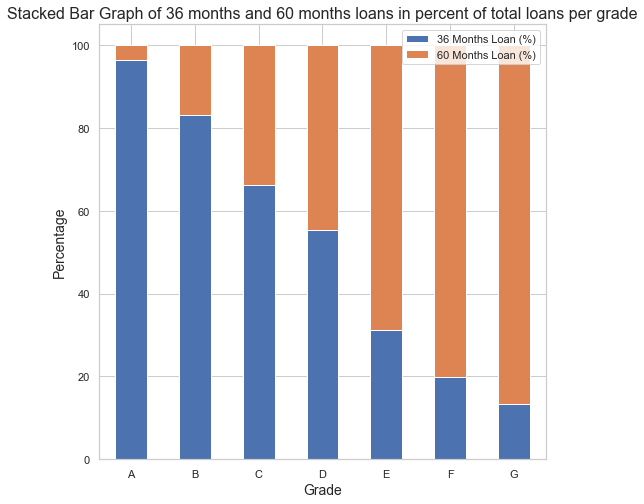

In [286]:
# Write the code for plotting the stacked bar-graph below.
# Write your code here
loans_df.plot(kind = 'bar', stacked = True,
             x = 'grade', y = ['36 months percentage', '60 months percentage'], figsize = (8,8))

plt.title('Stacked Bar Graph of 36 months and 60 months loans in percent of total loans per grade', fontsize=16)
plt.xlabel('Grade', fontsize=14)
plt.xticks(rotation = 'horizontal')
plt.ylabel('Percentage', fontsize =14)
plt.legend(['36 Months Loan (%)','60 Months Loan (%)'])

plt.show()

**2C**. You will be using the `wines-200.csv` again for this question. Read from the `wines-200.csv` dataset from **2A** to `wines_df2`. Remember to perform the `dropna()` step.

In [366]:
# Read from CSV file to wines_df2
# Remember to dropna()
# Write your code here.
wines_df2 = pd.read_csv('wines-200.csv')
wines_df2 = wines_df2.dropna()

wines_df2.head(10)

,country,points,price
0,US,86,50.0
1,Italy,92,48.0
2,France,89,19.0
3,US,92,34.0
4,US,84,20.0
5,Australia,96,120.0
6,Chile,83,17.0
7,Spain,86,19.0
8,Chile,90,235.0
9,France,88,23.0


**i) **Find the top 2 countries with the most wines in the dataset. **`[0.5]`**

In [367]:
# What are the top 2 countries in terms of number of wines produced?
# Write your code here
wines_df2.groupby('country').size()
# (Type your answer here)
# US, Italy

country
Argentina        7
Australia        4
Austria          2
Canada           2
Chile           10
France          20
Germany          4
Greece           1
Hungary          1
Italy           30
New Zealand      3
Portugal         7
Slovenia         1
South Africa     5
Spain            9
US              79
dtype: int64

**ii)** Using your answer in **(i)** or otherwise, debug and complete the following code to plot a violin plot of the wine prices of the top 2 countries with the most wines in the dataset. There should be a seperate violin plot for each country in the top 2. Refer to the [seaborn documentation](https://seaborn.pydata.org/generated/seaborn.violinplot.html), this [Stackoverflow answer](https://stackoverflow.com/questions/46134113/seaborn-violin-plot-from-pandas-dataframe-each-column-its-own-separate-violin-p) and this [Stackoverflow answer](https://stackoverflow.com/questions/48803619/what-is-the-correct-way-to-create-a-violin-plot-that-has-one-violin-split-by-hue) to help you. **`[1]`**

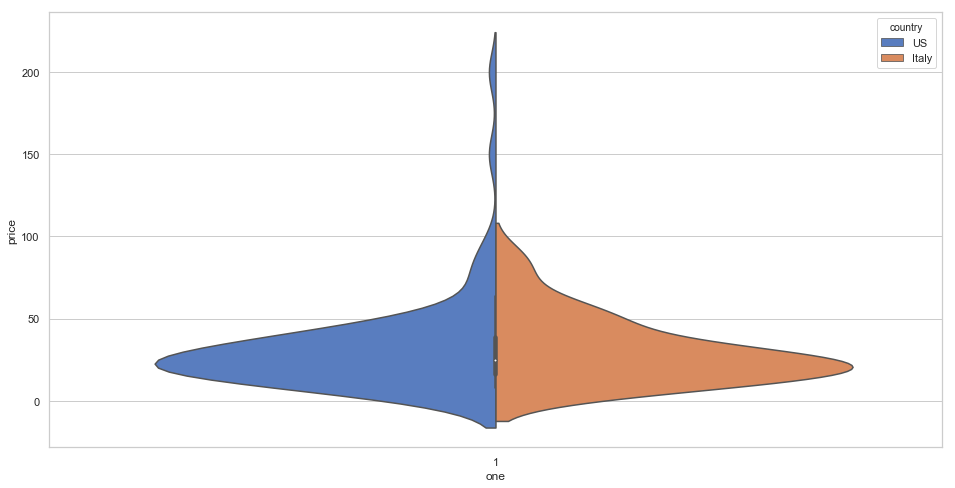

In [379]:
# Debug and complete the code for plotting the violin below.
wines_df2 = wines_df2[(wines_df2['country'] == 'US') |
                      (wines_df2['country'] == 'Italy')]

wines_df2['one'] = 1
plt.figure(figsize=(16,8))
sns.violinplot(x="one", y = 'price', data=wines_df2, palette="muted", hue = 'country', split = True)
plt.show()

<div class="alert alert-success">
**Checkpoint**: When you have completed Part 2, upload your progress to eLearn. eLearn only accepts the latest notebooks so if you have an existing notebook, your latest upload will **override** it.
</div>